In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6"  color="red">ch10. N차원 배열(Numpy) </font></b>

- [numpy](https://numpy.org)
- [numpy documents](https://numpy.org/doc/stable)

- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)

# 1절 넘파이 패키지

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [3]:
#np.range(from,stop,by) : from부터 stop앞까지 by씩 증가하는 1차원 배열 생성
a=np.arange(15) # 0부터 15앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열속성

In [4]:
from numpy import arange
a= arange(15,
         # dtype=np.int32  기본이 32
         ).reshape(3,5)# 3행 5열짜리 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
type(a) # a변수의 타입

numpy.ndarray

In [6]:
a.dtype #a배열의 요소들의 type

dtype('int32')

In [7]:
a.dtype.name

'int32'

In [8]:
a.itemsize # a배열안의 한 요소의 bytesize

4

In [9]:
a.ndim #축수(차원수)

2

In [10]:
a.size # 배열요소의 갯수

15

In [11]:
print(a.dtype, a.itemsize, a.size, a.nbytes)
# itemsize :배열 크기(원소 개수)가 아니라 “원소 하나의 크기”입니다.
# 배열 전체 메모리 사용량은 a.nbytes로 확인합니다. 예를 들어 위 예시에서 a.size가 15이고 itemsize가 4이므로 nbytes는 60이 됩니다.

int32 4 15 60


In [12]:
a.shape #배열의 구조(3행5열)

(3, 5)

In [13]:
print('shape 조정 전 a\n', a)

shape 조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [14]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [15]:
print('shape 조정 전 a\n', a)
a.shape=(5,3)
print('shape 조정 후 a\n', a)

shape 조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2 배열 타입 변경

In [16]:
a= arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [17]:
a= arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [18]:
print('dtype 조정 전 ',a.dtype, a.itemsize, a.size, a.nbytes)

dtype 조정 전  int32 4 12 48


In [19]:
a.dtype=np.int64 # 읽을 때 int64로(64bit씩) 읽는다.
a.dtype

dtype('int64')

In [20]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [21]:
print('dtype 조정후 ', a.dtype, a.itemsize, a.size, a.nbytes)

dtype 조정후  int64 8 6 48


In [22]:
a.dtype=np.int32

In [23]:
a=a.astype('int64')
a.astype(np.int64)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [24]:
print('astype 조정후 ', a.dtype, a.itemsize, a.size, a.nbytes)

astype 조정후  int64 8 12 96


In [25]:
a.ravel() #flatten된 배열 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [26]:
a.flatten() # 함수의 결과가 return되면 배열 수정안함

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열저장

- pkl(객체저장,배열 ,머신러닝 모델) vs npy(넘파이 전용 포맷,io속도 개선)

In [27]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

### * pickle로 저장,불러오기

In [28]:
%%time
# 매직명령어는 제일 위에 셀에 위치하고 , 옆에 아무것도 없이 단독으로 있어야 함
import pickle
with open('data/ch10.pk1', 'wb') as f:
    pickle.dump(a,f)

CPU times: total: 0 ns
Wall time: 998 µs


In [29]:
%%time
with open('data/ch10.pk1', 'rb')  as f:
    loaded_a=pickle.load(f)

CPU times: total: 0 ns
Wall time: 14.3 ms


In [30]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

### * npy로 저장 불러오기

In [31]:
%%time
np.save('data/ch10.npy',a) #저장

CPU times: total: 0 ns
Wall time: 993 µs


In [32]:
%%time
loaded_a2=np.load('data/ch10.npy')

CPU times: total: 0 ns
Wall time: 8.65 ms


# 2절 넘파이 배열
- array()함수를 이용하여 다른 파이썬 구조(list,tuple)로 배열로 변환
- 기타함수들 : arange, ones, zeros, full, empty, ...,linspace
- 랜덤값을 갖는 함수들 : np.random.~


## 2.1 array()함수로 넘파이 배열 만들기

    - array(obj, dtype=np.xx 나  'xx', copy=T/F)

In [33]:
a=np.array([2,4,6], dtype=np.int16) # 정수의 기본타입은 int32
a

array([2, 4, 6], dtype=int16)

In [34]:
a[0],a[1],a[2]

(2, 4, 6)

In [35]:
for i in a:
    print(i,end='\t')

2	4	6	

In [36]:
b=np.array([[1.5,2.3],  #배열은 동일 자료형의 집합 :  정수 => 실수 =>문자
           [4,   5]])
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [37]:
b[0][1],b[0,1] #2차원 [axis0행, axis1열]

(2.3, 2.3)

In [38]:
l=[[1.5,2.3],[4,5]]
l[0][1]

2.3

In [39]:
print(b.dtype)  # 정수 기본타입은 in32, 실수 기본타입은 float64
print(b.itemsize)

float64
8


In [40]:
b=b.astype(np.float32)   # 주의 : 이렇게 하면 다른 결과 b.dtype=np.float32
b

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [41]:
print(b.dtype)  
print(b.itemsize)

float32
4


In [42]:
for row in b:
    for item in row:
        print(item,end='\t')
    print() #개행

1.5	2.3	
4.0	5.0	


In [43]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print('{}행{}열 : {:.1f}({:.1f})'.format(i,j,item,b[i,j]),end='\t')
    print() #개행

0행0열 : 1.5(1.5)	0행1열 : 2.3(2.3)	
1행0열 : 4.0(4.0)	1행1열 : 5.0(5.0)	


### *인덱싱

In [44]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5],[6,7,8,9,0],[11,12,13,14,15]],dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13, 14, 15]], dtype=int16)

In [45]:
b[0,1]

2

In [46]:
b[3,0] # 없는 인덱싱시 에러

IndexError: index 3 is out of bounds for axis 0 with size 3

### * 슬라이싱

In [27]:
print('0~1행, 1~2열 :\n',b[0:2,1:3])
print('2행 모두(1차원) :',b[2,:], b[2])                       # 특정행, 모든 열을 추출할 경우, 열생략 가능
print('2행 모두(2차원) :',b[2:3,:], b[2:3]) 
print('4열(1차원) 모두 :',b[:,4],b[...,4],b[:,-1])            # 특정열, 모든 행을 추출할 경우
print('4열(2차원) 모두\n',b[:,4:],b[...,4:],b[:,-1:])
print('2행 0~3열 :', b[2,0:4],b[2,0:-1])
print('마지막열 제외 :\n', b[:,:-1])                          /    # 마지막열을 제외한 모든 것

SyntaxError: invalid syntax (3612027381.py, line 7)

In [48]:
#스칼라변수
a=10
copy_a=a  #복제본
print(f"a={a}, 복제본{copy_a}")
copy_a=-1
print(f"a={a}, 복제본{copy_a}")

a=10, 복제본10
a=10, 복제본-1


In [49]:
#데이터구조
a=[0,1]
copy_a=a.copy()  #깊은복사
print(f"a={a}, 복제본{copy_a}")
copy_a[0]=-1
print(f"a={a}, 복제본{copy_a}")

a=[0, 1], 복제본[0, 1]
a=[0, 1], 복제본[-1, 1]


In [50]:
# numpy 배열
c = np.array([[1,2],[3,4]])
d = c # 주소할당
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c),id(d))
d[0,0]=9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
1961946934864 1961946934864
c=
[[9 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


In [51]:
# numpy 배열
import numpy as np
c = np.array([[1,2],[3,4]])
d =  np.array(c,copy=True) # 복제  ; d=c.copy()
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c),id(d))
d[0,0]=9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
1961983628784 1961985123280
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기

- np.zeros(tup)          : 요소들이 다 0
- np.ones(tup)           : 요소들이 다 1
- np.full(tup, 기본값)   : 요소들이 다 두번째 매개변수
- np.empty(tup)          : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐)

<font color=red>※</font> 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64.dtype을 따로 지정가능

### zeros()

In [52]:
x = np.zeros( (3,2) ) # 3행2열짜리 2차원 float64 배열(요소들은 다 0)
# x = np.zeros( 3,2 ) # 에러
x = np.zeros( (3,) ) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x = np.zeros( 3 ) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x

array([0., 0., 0.])

In [53]:
x= np.zeros((2,5),dtype=np.int16)
print(x)
print(x.dtype)
print(x.itemsize)

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [54]:
x= np.zeros((2,5),dtype=np.bool8)
print(x)
print(x.dtype)
print(x.itemsize)

[[False False False False False]
 [False False False False False]]
bool
1


### ones()

In [55]:
np.ones((2,5),dtype=np.complex64)

array([[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]], dtype=complex64)

In [56]:
x= np.ones((2,5),dtype=np.int8)
x

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

In [57]:
y= np.ones((2,5),dtype=np.uint8)
y

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

### full()

In [58]:
np.full((2,3),-1.2)

array([[-1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2]])

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))                  # 시각화한 그래프 크기 figsize = (가로,세로)
colorN = int(input("칼라를 입력하세요"))
img = np.full((28,28),colorN,dtype=np.uint8)  #회색
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # 축없애기
plt.show()

칼라를 입력하세요


ValueError: invalid literal for int() with base 10: ''

<Figure size 200x200 with 0 Axes>

### empty()

In [ ]:
import numpy as np
np.empty((3,2))    # 초기값이 메모리 상태에 따라 다름

## 2.3 랜덤값을 갖는 배열 만들기

- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값 
- np.random.uniform(low=0.0, high=1.0,size=tup) : low부터high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0.0,scale=1.0,size=tup)  : 평균 loc과 표준편차 scale을 갖ㅂ는 정규분포 랜덤값

- np.random.rand(n)      : 균등분포의 1차원 난수 배열발생(난수n개)  - 0부터 1미만의 균등분포의 1차원 배열
- np.random.randn(n)     : 표준정규분포(평균0,표준편차1)

cf) np.random.randint([from],to) <font color=red>(배열아님)</font> :from부터  to미만의 정수 난수 1개 발생 == random.randint(from, to-1)

In [60]:
# 매개변수 사이의 1를 랜덤하게 반환
import random
random.randint(1,3) # 1,2,3

1

In [61]:
np.random.randint(1,3) # 1,2

2

In [62]:
np.random.random((2,3))

array([[0.56129859, 0.90467064, 0.77186337],
       [0.62976665, 0.51385175, 0.44817747]])

In [63]:
np.random.rand(2)

array([0.41717417, 0.09289124])

In [64]:
# *random() rand() 균등분포를 갖는 랜덤값배열

###   **rand 사용(밀도함수)

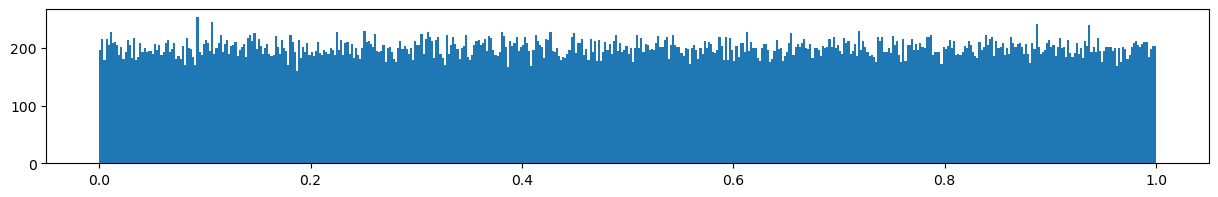

In [65]:
import matplotlib.pyplot as plt

x = np.random.rand(100000)
#print(x)
plt.figure(figsize=(15,2))   # 그래프크기
plt.hist(x,bins=500)
plt.show()


### **randn사용(정규분포)

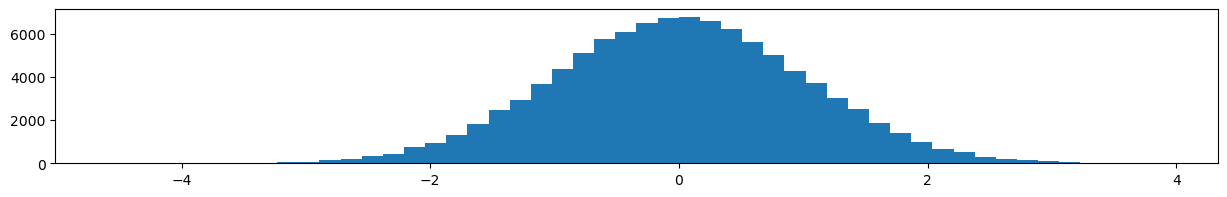

In [66]:
import matplotlib.pyplot as plt

x = np.random.randn(100000)  #정규분포(표준정규분포는 평균0, 표준편차가 1인 정규분포)
#print(x)
plt.figure(figsize=(15,2))   # 그래프크기
plt.hist(x,bins=50)
plt.show()

In [67]:
# 1차원 난수 배열
print(np.random.rand(3)) #균등분포
print(np.random.randn(3)) #정규분포

[0.91455087 0.30016589 0.04087713]
[-1.17108952  0.94040133  0.01319373]


In [68]:
# 2차원 난수 배열
np.random.random((2,5)) #2행 5열짜리 균등분포(0~1) 난수 배열

array([[0.3223088 , 0.08434359, 0.93207937, 0.4640433 , 0.35724734],
       [0.20241777, 0.43888762, 0.9384017 , 0.91115096, 0.27527324]])

In [69]:
np.random.uniform(low=-2,high=2,size=(2,5)) #2행 5열짜리 균등분포 (-2 ~ 2미만) 난수 배열

array([[-1.83550872, -1.85339936, -1.03726056,  0.69364632,  1.42226872],
       [ 1.89432597, -1.48614347,  0.33592294,  0.46109851,  1.65143187]])

### **normal

In [70]:
np.random.normal(size=(2,5))  # 2행 5열짜리 정규분포(평균0, 표준편차1) 난수배열

array([[-0.06154811,  1.43554787,  0.88243884, -0.85358201, -0.99842641],
       [-0.69142176, -1.44285154,  1.69991123, -0.80688513,  0.74455336]])

In [71]:
np.random.normal(-1,1,size=(2,5))  # 2행 5열짜리 정규분포(평균-1, 표준편차1) 난수배열

array([[ 0.71459092, -0.69217729, -0.76312237,  0.00839992, -1.30925756],
       [-0.41413151, -0.23162949,  0.43397667, -1.06899223, -0.90485244]])

## 2.4 연속된 값을 갖는 1차원 배열 만들기

- np.arange(from,to,by,dtype) : from부터  to앞까지 by씩 건너뛴 값을 1차원 배열로 생성
- np.linspace(from,to,num) :from부터 to(to포함)까지 num개 숫자들을 1차원 배열로 생성

### arange

In [72]:
np.arange(10,30,5,dtype=np.float64)

array([10., 15., 20., 25.])

In [73]:
np.arange(0,2.1,0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1])

### linspace : 특정한 범위의 수들을 많이 생성할 때

In [74]:
np.linspace(0,5,6)

array([0., 1., 2., 3., 4., 5.])

In [75]:
np.linspace(0,5,5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [76]:
### linspace : 특정한 범위의 수들을 많이 생성할 때
from numpy import pi, linspace
x = linspace(0, 2*pi, 1000)
y = np.sin(x)

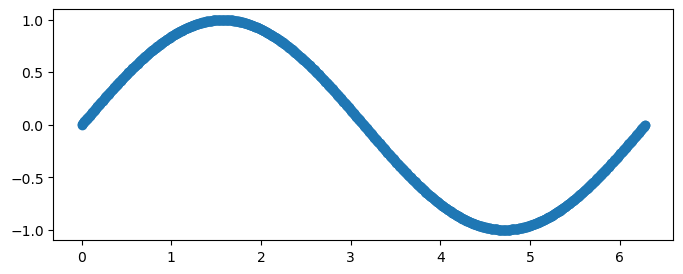

In [77]:
plt.figure(figsize=(8,3))
plt.scatter(x,y)
plt.show()

## 2.5 배열의 차원변경

- reshape(행수,열수) : -1 가능
- resize(행수,열수)  : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [78]:
t = np.random.random((2,3))
t

array([[0.28596903, 0.93228379, 0.407172  ],
       [0.23048067, 0.14919319, 0.96265046]])

In [79]:
np.array([1,2,3])*3 # [1,2,3]*3

array([3, 6, 9])

In [80]:
a = np.round(t*10) #반올림
a

array([[ 3.,  9.,  4.],
       [ 2.,  1., 10.]])

In [81]:
a = a.astype(np.int16)  
a

array([[ 3,  9,  4],
       [ 2,  1, 10]], dtype=int16)

### <font color=red>※reshape</font>

In [82]:
a.reshape(-1,1)  # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[ 3],
       [ 9],
       [ 4],
       [ 2],
       [ 1],
       [10]], dtype=int16)

In [83]:
a.reshape(3,-1)

array([[ 3,  9],
       [ 4,  2],
       [ 1, 10]], dtype=int16)

### * resize

In [84]:
a.resize(2,3)  # 실행결과가 출력 안되면 a가 바뀜
a

array([[ 3,  9,  4],
       [ 2,  1, 10]], dtype=int16)

In [85]:
a.reshape((2,3))

array([[ 3,  9,  4],
       [ 2,  1, 10]], dtype=int16)

In [86]:
a.resize((3,2))
a

array([[ 3,  9],
       [ 4,  2],
       [ 1, 10]], dtype=int16)

In [87]:
a.resize(2,-1)  # resize는 -1 사용불가

ValueError: negative dimensions not allowed

### 전치행렬  (x행 y열 => y행 x열)

In [88]:
a.T     # a의 전치행렬

array([[ 3,  4,  1],
       [ 9,  2, 10]], dtype=int16)

In [89]:
a.transpose()  # a의 전치행렬

array([[ 3,  4,  1],
       [ 9,  2, 10]], dtype=int16)

## 2.6 배열 출력

In [90]:
np.arange(1001)  # np.arange(1001)

array([   0,    1,    2, ...,  998,  999, 1000])

In [91]:
# 배열 요소가 몇개까지 다 출력되나, 1000개 이상은 생략되서 출력
np.get_printoptions()['threshold']

1000

In [92]:
# 배열이 커서 인쇄가 안되는 경우. : 모서리 부분만 출력
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [93]:
# 인쇄 옵션변경
import sys 
np.set_printoptions(threshold=sys.maxsize)  # 정수 최대치까지 출력가능
np.set_printoptions(threshold=np.inf)       #무한대까지 출력 가능

In [94]:
np.arange(10000).reshape(100,100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

## 2.7 기본 연산 동작
## 1)배열의 요소별 연산

In [96]:
import numpy as np
# 리스트
a= [10,20,30,40]
b=list(range(4))
a+b,a*3

([10, 20, 30, 40, 0, 1, 2, 3],
 [10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40])

In [98]:
# numpy array
a=np.array([10,20,30,40])
b=np.arange(4)
a,b

(array([10, 20, 30, 40]), array([0, 1, 2, 3]))

In [99]:
a+b  #요소별 +연산

array([10, 21, 32, 43])

In [100]:
a*3  #요소별 *3연산

array([ 30,  60,  90, 120])

In [101]:
a*b #요소별 *연산

array([  0,  20,  60, 120])

In [102]:
a**b #요소별 제곱연산

array([    1,    20,   900, 64000])

In [103]:
a < 40 #요소별 연산

array([ True,  True,  True, False])

In [107]:
print(a[[0,3]])  # 0,3번째 인덱스 item
print(a[[True,False,False,True]])  #  0은 TTrue, 1은 False, 2dms False,4번째 True

[10 40]
[10 40]


In [108]:
# a배열에서 40보다 작은 데이터만 추출(boolean index)
a[a<40]

array([10, 20, 30])

In [109]:
# a배열에서 40보다 작은 데이터의 index
np.where(a<40)

(array([0, 1, 2], dtype=int64),)

## 2)행렬의 곱(@,dot함수)

cf. *(요소별 곱)

In [112]:
A = np.array([ [1,1],
               [0,1]])
B = np.array([ [2,0],
               [3,4]] )
A,  B

(array([[1, 1],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [114]:
print('요소별 곱 A*B =' , A*B, sep='\n')
print('행렬곱 A@B =' , A@B , sep='\n')
print('행렬곱 A.dot(B)=', A.dot(B), sep='\n')

요소별 곱 A*B =
[[2 0]
 [0 4]]
행렬곱 A@B =
[[5 4]
 [3 4]]
행렬곱 A.dot(B)=
[[5 4]
 [3 4]]


In [116]:
# 일반적으로 행렬곱은 교환법칙이 성립안함.
print('A@B =', A@B, sep='\n')
print('B@A =', B@A, sep='\n')

A@B =
[[5 4]
 [3 4]]
B@A =
[[2 2]
 [3 7]]


In [117]:
# 19페이지 확인 (1)
A = np.array([ [1,2],
               [3,4]])
B = np.array([ [-1,-1],
               [1,1]] )
A@B, B@A

(array([[1, 1],
        [1, 1]]),
 array([[-4, -6],
        [ 4,  6]]))

In [120]:
# 19페이지 확인 (3)
A = np.array([ [1,2,3],
               [3,4,1]])
B = np.array([ [0,0],
               [1,1],
              [-1,2]] )
A@B, B@A

(array([[-1,  8],
        [ 3,  6]]),
 array([[ 0,  0,  0],
        [ 4,  6,  4],
        [ 5,  6, -1]]))

In [123]:
# 19페이지 확인 (2)
A = np.array([ [1,2],
               [3,4]])
B = np.array([ [6],
               [7]] )
A@B,  # B@A는 에러

(array([[20],
        [46]]),)


## * 단위 행렬에서는 교환법칙 성립


In [126]:
# 19페이지 확인 (4)
A = np.array([ [2,0],
               [3,4]])
B = np.array([ [1,0],
               [0,1]] )
A@B,  B@A  # B : 2행 2열짜리 단위행렬

(array([[2, 0],
        [3, 4]]),
 array([[2, 0],
        [3, 4]]))

In [127]:
np.eye(2) # 2행 2열짜리 단위행렬

array([[1., 0.],
       [0., 1.]])

In [128]:
np.eye(3) # 3행 3열짜리 단위행렬 (정방행렬)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## 3)복합 대입 연산자 사용(+=,-=,*=,..)

- 배열에서의  a += b는 a = a + b와 다소 다르게 작동한다.

In [147]:
a = np.ones((2,3), dtype='int8') # 2행 3열짜히 int8 배열
b = np.random.random((2,3)) # 2행 3열짜리 random값(0부터 1미만의 균등분포를 갖는) float64 배열
print(a,b,sep='\n')

[[1 1 1]
 [1 1 1]]
[[0.56897035 0.06906523 0.56959471]
 [0.7508117  0.66148512 0.94393024]]


In [148]:
a += 256 # a+256 결과를 a에 넣는데 , 공간이 부족하면 앞이 짤림.
a

array([[1, 1, 1],
       [1, 1, 1]], dtype=int8)

In [149]:
a = a + 256 # a+256결과를 새로운 a에 할당
a

array([[257, 257, 257],
       [257, 257, 257]], dtype=int16)

In [150]:
# a는 int16, b는 float64
b.dtype

dtype('float64')

In [151]:
b += a  # b+a의 결과를 기존 b에 넣는다.
b

array([[257.56897035, 257.06906523, 257.56959471],
       [257.7508117 , 257.66148512, 257.94393024]])

In [152]:
a += b  # a+b의 결과를 a에 넣는다.
a

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'

## 4) 배열 요소별 집계

- sum, min, max, mean, var(분산), std(표준편차)

In [153]:
a = np.array([[2,2,2,3],
              [4,3,2,1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [159]:
print('전체 합 : ', a.sum(), np.sum(a)) 
print('전체 평균 : ', a.mean(), np.mean(a)) 
print('전체 최소값 : ', a.min(), np.min(a)) 
print('전체 최대값 : ', a.max(), np.max(a))
print('전체 분산 : ', a.var(), np.var(a)) 
print('전체 표준편차 : ', a.std(), np.std(a)) 

전체 합 :  19 19
전체 평균 :  2.375 2.375
전체 최소값 :  1 1
전체 최대값 :  4 4
전체 분산 :  0.734375 0.734375
전체 표준편차 :  0.8569568250501305 0.8569568250501305


In [160]:
# 분산에 루트를 씌우면 표준편차
import math
math.sqrt(a.var()) #math.sqrt(스칼라데이터)

0.8569568250501305

## 5)배열 축별 평균

- 축별 sum, min,max,mean, var(분산), std(표준편차), argmax(최대값index)

In [163]:
a


array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [166]:
# 행별 합계 : axis=0(행), axis=1(열)  :행을 고정하고 열(axis1축)들의 합
print('a의 행별 합 :', a.sum(axis=1), np.sum(a, axis=1))
print('a의 행별 평균 :', a.mean(axis=1), np.mean(a, axis=1))

a의 행별 합 : [ 9 10] [ 9 10]
a의 행별 평균 : [2.25 2.5 ] [2.25 2.5 ]


In [167]:
# 열별 합계  :열을 고정하고 행(axis0축)들의 합
print('a의 열별 합 :', a.sum(axis=0), np.sum(a, axis=0))
print('a의 열별 평균 :', a.mean(axis=0), np.mean(a, axis=0))

a의 열별 합 : [6 5 4 4] [6 5 4 4]
a의 열별 평균 : [3.  2.5 2.  2. ] [3.  2.5 2.  2. ]


## 2.8 그 외 요소별 계산하는 범용함수들

- 메모리를 효율적으로 사용할 수 있음.
    * np.add(A,B,C) : C = np.add(A,B)  : C=A+B
    * np.multiply(A,B,C) : C=np.multiply(A,B) : C=A*B
    * np.subtract(A,B,C) ...
    * np.sqrt(배열) : 제곱근 cf.math.sqrt(스칼라변수)

In [170]:
a = np.array([1,2])
b = np.array([3,4])
c = np.empty((2,))
a,b,c

(array([1, 2]), array([3, 4]), array([1.06099790e-313, 8.48798317e-314]))

In [173]:
%%time
np.add(a,b,c)
c

CPU times: total: 0 ns
Wall time: 0 ns


array([4, 6])

In [174]:
%%time
c = a+b
c

CPU times: total: 0 ns
Wall time: 0 ns


array([4, 6])

### *메모리 사용량과 속도 측정을 해주는 메모리 프로파일러를 로드

In [84]:
# 아나콘다 프롬프트에서 pip install 라이브러리이름(memory_profiler)
import numpy as np
%load_ext memory_profiler
A = np.random.randn(100000000)  # 1억개 요소
B = np.random.randn(100000000)
C = np.random.randn(100000000)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [85]:
A,B,C

(array([ 1.12230775,  0.07917301,  0.01616598, ..., -0.84240597,
        -0.32904312,  1.26935455]),
 array([ 0.17488838, -0.09616602,  0.13547094, ...,  0.45332937,
        -0.80751504,  0.59752128]),
 array([-0.79924904,  0.9371925 , -0.03019531, ..., -1.28730205,
         0.76150103,  0.31488835]))

In [86]:
# %%time : 셀실행시 소용시간 출력(셀 맨위에)
# %memit : 메모리 사용량 출력

In [87]:
%%time
%memit G = A*B + C
print(G)

peak memory: 5245.58 MiB, increment: 1473.41 MiB
[-0.60297046  0.92957874 -0.02800529 ... -1.66918942  1.0272083
  1.07335471]
CPU times: total: 703 ms
Wall time: 1.58 s


In [88]:
%%time
%memit np.multiply(A,B,C); np.add(G,C,G)
print(G)

peak memory: 4535.12 MiB, increment: 0.00 MiB
[-0.40669188  0.92196499 -0.02581527 ... -2.05107679  1.29291557
  1.83182108]
CPU times: total: 375 ms
Wall time: 1.21 s


## 2.9 브로드 캐스팅

- 서로 다른 크기의 배열간 연산을 수행할 수 있도록 해주는 강력한 기능.

In [89]:
a = np.array([1,2,3])
b = 10
print(a+b)       # 요소별 연산
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [90]:
# 1차원 배열의 브로드 캐스팅
a = np.array([1,2,3])
b = np.array([10])
print(a+b)       # 요소별 연산
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [91]:
b

array([10])

In [92]:
a*b

array([10, 20, 30])

In [93]:
# 2차원 배열의 브로드 캐스팅
a = np.array([[0,0,0],
              [10,10,10],
              [20,20,20],
              [30,30,30]])  #4행 3열짜리 2차원 배열
b=np.array([0,1,2])         # 3열짜리 1차원
np.add(a,b), np.multiply(a,b)

(array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]),
 array([[ 0,  0,  0],
        [ 0, 10, 20],
        [ 0, 20, 40],
        [ 0, 30, 60]]))

In [94]:
a = np.array([[0,0,0],
              [10,10,10],
              [20,20,20],
              [30,30,30]]) #4행 3열짜리 2차원 배열
b=np.array([[0],
            [1],
            [2],
            [3]])  # 3열짜리 1차원
np.add(a,b), np.multiply(a,b)

(array([[ 0,  0,  0],
        [11, 11, 11],
        [22, 22, 22],
        [33, 33, 33]]),
 array([[ 0,  0,  0],
        [10, 10, 10],
        [40, 40, 40],
        [90, 90, 90]]))

In [95]:
# a,b를 모든 쌍 조합에 대해 계산을 하고 싶을 때
a = np.array([0,10,20,30])  #4열짜리 1차원 배열(브로드 캐스팅 이용)
b = np.array([1,2,3])
# 1차원 배열 a를 2차원배열로
A = a.reshape(4,1)        # A = a.reshape(-1,1)
A = a[:,np.newaxis ]      # newaxis를 이용하여 배열의 새로운 축을 추가하여 2차원
A = np.expend_dims(a, axis=1)
A

AttributeError: module 'numpy' has no attribute 'expend_dims'

In [ ]:
A + b

In [ ]:
# a,b를 모든 쌍 조합에 대해 계산을 하고 싶을 때
a = np.array([0,10,20,30])  #4열짜리 1차원 배열
b = np.array([1,2,3])
A,B = np.ix_(a,b)
A, B

In [ ]:
A + B

# 3절 배열 합치기/ 배열 분리하기

- 슬라이싱
- 두 배열을 합치는 함수 : 
- r_, c_
- 하나의 배열을 여러개 작은 배열로 분리하는 함수
## 3.1 슬라이싱

In [ ]:
c = np.arange(24).reshape(2,3,4)
c

In [ ]:
c[0,2,1] # c[2,0,0] 없는 인덱스는 에러

In [ ]:
# 0면 모든 데이터 
print('0면 모든 데이터  :\n', c[0],c[0,:,:],c[0,...]) #0면의 모든 데이터(후행축은 생략 가능)
# 1면 0행의 모든 데이터
print('1면 0행의 모든 데이터  :\n', c[1,0],c[1,0,:],c[1,0,...])# 1면0행의 모든 데이터(후행축은 생략가능)
# 1면 1열의 모든 데이터
print('1면 1열의 모든 데이터  :\n', c[1,:,1],c[1,...,1])#1면 1열의 모든 데이터(선행축이나 중간축은 생략이 불가) 
# 모든 면의 1~2행, 2~3열까지
print('모든 면의 1~2행, 2~3열 모든 데이터  :\n', c[:,1:3,2:],c[...,1:3,2:]) #모든 면의 1~2행, 2~3행까지

## 3.2 두 배열을 쌓아 합치는 함수

- vstack( tup ) : 아래로 추가하는 방식
- hstack( tup ) : 옆으로 추가하는 방식
- dstack( tup ) : 마지막 축(열)을 쌓아 합침(차원 증가)

In [96]:
a = np.array([1,2,3])
b = np.array([4,5,6])
v = np.vstack((a,b))
print('vstack 아래로 추가하여 합치기 : ', v,v.shape, sep='\n')
h = np.hstack((a,b))
print('hstack 옆으로 추가하여 합치기 :', h,h.shape, sep='\n')
d = np.dstack((a,b))
print('dstack 축을 depth로 합치기 :', d,d.shape, sep='\n')

vstack 아래로 추가하여 합치기 : 
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 추가하여 합치기 :
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기 :
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [97]:
c = np.arange(24).reshape(2,3,4,)
print(c)
a,b = c  # c[0]이 a, c[1]이 b
a,b

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

## - 수직으로 합치기

In [98]:
#수직으로 합치기
np.vstack((a,b))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [99]:
np.concatenate((a,b),axis=0) #axis=0이 기본값

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

## - 옆으로 합치기

In [100]:
# 옆으로 합치기
np.hstack((a,b))

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [101]:
np.concatenate((a,b),axis=1) #axis=0이 기본값

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [102]:
- column_stack( tup ) : 1차원 배열을 2차원 배열의 열단위로 합침. dstack과 비교
- row_stack( tup )    : 행단위로 합침 == vstack()

SyntaxError: invalid decimal literal (2155141150.py, line 1)

In [103]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])
np.column_stack((a,b,c))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [106]:
np.dstack((a,b,c)).reshape(4,3)

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [108]:
np.hstack((a[:,np.newaxis],b[:,np.newaxis],c[:,np.newaxis]))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [109]:
# 행쌓기
np.row_stack((a,b,c))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [111]:
# 수직쌓기
np.vstack((a,b,c))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

## - stack(tup, axis=n)  : axis=0: 첫번째 차원(2차원일 때는 행, 3차원일때는 면), axis=-1

In [116]:
a = np.arange(12).reshape(3,4)
b= np.arange(12,24).reshape(3,4)
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [117]:
# 0면에 a, 1면에 b로 stack
np.stack((a,b),axis=0)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [118]:
# 행(1축)끼리 합쳐서 면을 이룸
np.stack((a,b),axis=1)

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [119]:
# a의 행과 b의 행이 열로 합쳐서 면을 이룸
np.stack((a,b),axis=-1)

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_, c_
- 나열 객체

In [120]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])
np.r_[a,b,c] # 한행으로 합치기

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [121]:
np.r_[[a],[b],[c]]

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [122]:
np.c_[a,b,c]  # 컬럼단위로 쌓아줌

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [123]:
np.column_stack((a,b,c))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

## 3.4 배열을 분리하는 함수
- vsplit(ary, 정수나 벡터) :  첫번째 축을 따라 분할(2차원의 경우 가로축)
- hsplit(ary, 정수나 벡터) :  두번째 축을 따라 분할(2차원의 경우 세로축)
- dsplit(ary, 정수나 벡터) :  depth를 따라 분할 ( 3차원이상에서만 동작 )
    * 정수 n : n개로 분리
    * [n] : n번째 인덱스를 기점으로 분리
    * [m,n] : m번째, n번째 인덱스를 기점으로 분리

In [124]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [125]:
# 가로축을 따라 3개로 분할(분할 후 차원 유지)
a_v = np.vsplit(a, 3)
a_v

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [126]:
# 가로축을 따라 1번 index기준으로 분할(분할 후 차원 유지)
a_v = np.vsplit(a, [1])
a_v

[array([[0, 1, 2, 3]]),
 array([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])]

In [127]:
# 가로축을 따라 1, 2번 index기준으로 분할(분할 후 차원 유지)
a_v = np.vsplit(a, [1, 2])
a_v

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [128]:
np.hsplit(a, 2)

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [129]:

np.hsplit(a, [1,3])

[array([[0],
        [4],
        [8]]),
 array([[ 1,  2],
        [ 5,  6],
        [ 9, 10]]),
 array([[ 3],
        [ 7],
        [11]])]

- split(ary, 갯수나 인덱스벡터, axis=?)
- array_split(ary, 갯수나 인덱스벡터, axis=?)
   * axis=0 : vsplit() 동일
   * axis=1 : hspilit() 동일
   * axis=2 : dspilit() 동일
   - array_split : 나눠지지 않는 정수로도 사용가능

In [131]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [132]:
np.split(a,2,axis=0) # axis=0 :0번축 기준으로 분리

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [133]:
np.split(a, 2, axis=1) # axis=1 : 1번축기준으로 분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [134]:
np.array_split(a, 2, axis=1) # axis=1 : 1번축기준으로 분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [135]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [136]:
# np.split(a, 3, axis=1) 에러

In [137]:

np.array_split(a, 3, axis=1) # 나눠서 떨어지지 않는 수로도 분리가능

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]